In [1]:
!pip install opendatasets
!pip install pandas
!pip install art
# !pip install cleverhans
!pip install matplotlib
!pip install tensorflow
!pip install opencv-python
!pip install scikit-learn
!pip install foolbox



In [2]:
!pip install tabulate

In [2]:
#Importing required libraries.

import numpy as np
import pandas as pd
import os
import cv2
import opendatasets as od
import matplotlib.pyplot as plt

In [5]:
od.download(
	"https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Downloading drowsiness-dataset.zip to ./drowsiness-dataset


100%|██████████| 161M/161M [00:04<00:00, 39.5MB/s] 


In [6]:
od.download('https://www.kaggle.com/datasets/adinishad/prediction-images', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading prediction-images.zip to ./prediction-images


100%|██████████| 1.18M/1.18M [00:00<00:00, 9.25MB/s]

In [4]:
labels = os.listdir("./drowsiness-dataset/train")

In [5]:
labels

['Closed', 'no_yawn', 'yawn', 'Open']

In [8]:
#getting shape of random image
a = plt.imread("./drowsiness-dataset/train/yawn/150.jpg")
a.shape

(480, 640, 3)

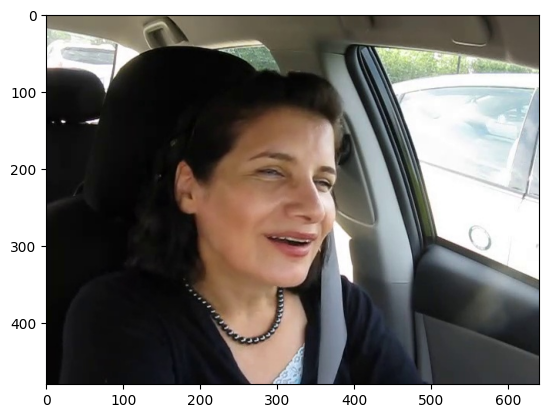

In [9]:
plt.imshow(a)

Here, we are processing a driver drowsiness detection image dataset. It detects faces in the "yawn" and "no_yawn" image categories using OpenCV and resizes the detected regions of interest to 224x224 pixels. The resized image arrays, along with their class labels (0 or 1), are stored in a list called `yaw_no`. The function returns this list for all images in the specified directory.

In [10]:
def face_for_yawn(direc="./drowsiness-dataset/train", face_cas_path="./prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []  # create an empty list to store image arrays and their respective class numbers
    IMG_SIZE = 224  # define the size of the image to be resized to
    categories = ["yawn", "no_yawn"]  # define the categories of the images
    for category in categories:
        path_link = os.path.join(direc, category)  # create a path to the directory of each category
        class_num1 = categories.index(category)  # assign a unique class number to each category
        print(class_num1)  # print the class number for debugging purposes
        for image in os.listdir(path_link):  # loop through all the images in the directory
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)  # read the image and store it as an array
            face_cascade = cv2.CascadeClassifier(face_cas_path)  # load the face cascade classifier
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)  # detect all faces in the image
            for (x, y, w, h) in faces:  # loop through all the detected faces
                try:
                    img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)  # draw a rectangle around the face
                    roi_color = img[y:y+h, x:x+w]  # crop the image to only include the face
                    resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))  # resize the cropped image to the desired size
                    yaw_no.append([resized_array, class_num1])  # add the resized image and its class number to the list
                except Exception as e:
                    print(e)
    return yaw_no  # return the list of resized images and their class numbers


yawn_no_yawn = face_for_yawn()  # call the face_for_yawn function and store the result in yawn_no_yawn variable


0
1


In [11]:
data_yawn = face_for_yawn()

0
1


We've defined a function that reads in driver drowsiness detection images from a specified directory. The function iterates over the "Closed" and "Open" categories of images, resizes each image array to 224x224 pixels, and appends it with its corresponding class label (2 or 3 for "Closed" or "Open", respectively) to a list called `data`. The function returns the `data` list containing all the resized images with their corresponding class labels for all the images in the specified directory.

In [12]:
# This function is getting data from a directory
# It is using a Haar cascade for face detection and eye detection
# It is resizing the images to a specified size and appending the resized image and its label to a list
# The function returns the list of data
def get_data(dir_path="./drowsiness-dataset/train/", face_cas="./prediction-images/haarcascade_frontalface_default.xml", eye_cas="./prediction-images/haarcascade.xml"):
    # Define the labels for the data
    labels = ['Closed', 'Open']
    # Define the size of the images after resizing
    IMG_SIZE = 224
    # Create an empty list to store the data
    data = []
    # Loop through each label in the labels list
    for label in labels:
        # Define the path to the label's directory
        path = os.path.join(dir_path, label)
        # Get the index of the label in the labels list
        class_num = labels.index(label)
        # Add 2 to the class number to account for the additional classes for face and eyes
        class_num += 2
        # Loop through each image in the label's directory
        for img in os.listdir(path):
            try:
                # Read in the image and resize it
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # Append the resized image and its label to the data list
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    # Return the list of data
    return data


In [13]:
data_eyes = get_data()

## Appending yawn and non-yawn face images to the existing dataset

In [14]:
def append_data():
    # call the `face_for_yawn()` function to get yawning and non-yawning face images
    yaw_no = face_for_yawn()

    # call the `get_data()` function to get open and closed eye images
    data = get_data()

    # combine the two datasets into a single list using the `extend()` method
    yaw_no.extend(data)

    # convert the resulting list to a NumPy array and return it
    # changing this for now as this give me an error
    # return np.array(yaw_no)

    return yaw_no


In [15]:
new_data = append_data()

0
1


## Creating feature and label lists from the dataset

In [16]:
# Initialize empty lists to store features and labels
X = []
y = []

# Iterate over each tuple of feature and label in the new_data list
for feature, label in new_data:

    # Append the feature to the X list
    X.append(feature)

    # Append the label to the y list
    y.append(label)


###  the feature array to be compatible with the input shape of the deep learning model.






In [17]:
X = np.array(X)
X = X.reshape(-1, 224, 224, 3)

### One-hot encoding the labels using scikit-learn's LabelBinarizer






In [18]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [19]:
print(X.shape)
print(y.shape)

(1925, 224, 224, 3)
(1925, 4)


## Converting y(Labels) to a numpy array.






In [20]:
y = np.array(y)

## Splitting data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [29]:
import numpy as np

if not os.path.exists('processed_data/'):
    os.makedirs('processed_data/')

# Save X_train, X_test, y_train, y_test
np.save('processed_data/X_train.npy', X_train)
np.save('processed_data/X_test.npy', X_test)
np.save('processed_data/y_train.npy', y_train)
np.save('processed_data/y_test.npy', y_test)


In [3]:
# Load the data back
X_train = np.load('processed_data/X_train.npy')
X_test = np.load('processed_data/X_test.npy')
y_train = np.load('processed_data/y_train.npy')
y_test = np.load('processed_data/y_test.npy')

# Imports

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Data Augmentation

In [5]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model


In [44]:
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'input_combined' is the input data for the combined model
input_combined = keras.Input(shape=(224, 224, 3))  # Adjust based on your data shape

# Base pre-trained model (e.g., MobileNetV2)
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_combined)

# Add custom layers for classification
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(4, activation='softmax')(x)  # 4 classes: eyes open/close, yawn/no yawn

# Create the model
model = keras.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


9406464/9406464 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [6]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Training the model

In [48]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 13s 276ms/step - loss: 0.1219 - accuracy: 0.9562 - val_loss: 6.0874 - val_accuracy: 0.7630
Epoch 2/50
43/43 [==============================] - 11s 261ms/step - loss: 0.0739 - accuracy: 0.9725 - val_loss: 2.9777 - val_accuracy: 0.8253
Epoch 3/50
43/43 [==============================] - 11s 258ms/step - loss: 0.0670 - accuracy: 0.9792 - val_loss: 10.9926 - val_accuracy: 0.7509
Epoch 4/50
43/43 [==============================] - 11s 262ms/step - loss: 0.0707 - accuracy: 0.9755 - val_loss: 0.4476 - val_accuracy: 0.9429
Epoch 5/50
43/43 [==============================] - 11s 263ms/step - loss: 0.0356 - accuracy: 0.9852 - val_loss: 0.3663 - val_accuracy: 0.9533
Epoch 6/50
43/43 [==============================] - 11s 263ms/step - loss: 0.0876 - accuracy: 0.9703 - val_loss: 1.6578 - val_accuracy: 0.7768
Epoch 7/50
43/43 [==============================] - 11s 259ms/step - loss: 0.0363 - accuracy: 0.9874 - val_loss: 4.5170 - val_accuracy: 0.664

In [50]:
model.save("driver_drowsiness_mobilenet_imagenet.h5")

# Evaluations

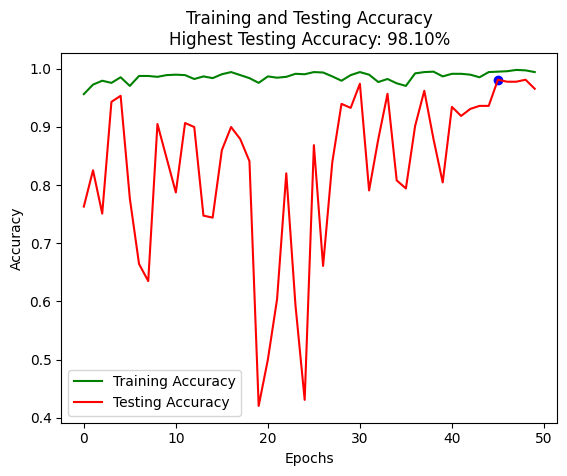

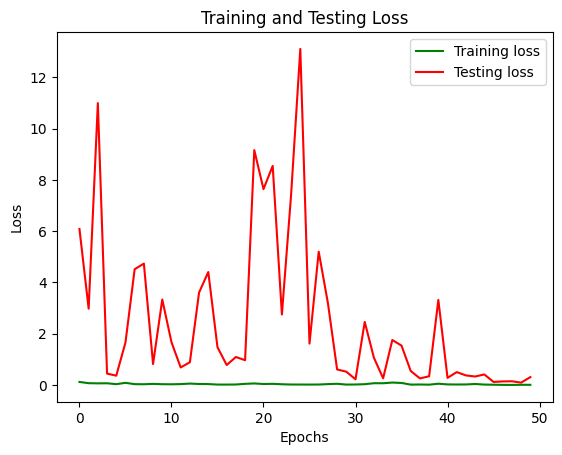

In [51]:
# Extracting the accuracy and loss values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Finding the index and value of the highest testing accuracy
max_val_acc = max(val_accuracy)
max_val_acc_index = val_accuracy.index(max_val_acc)
#max and min loss and accuracy values - test and train
min_val_acc = min(val_accuracy)
max_accuracy = max(accuracy)
min_loss =  min(loss)
min_val_loss = min(val_loss)

# Plotting the highest testing accuracy as a point on the accuracy plot
plt.plot(max_val_acc_index, max_val_acc, marker='o', color='blue')

# Plotting the training and testing accuracy over epochs
plt.plot(epochs, accuracy, "g", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "r", label="Testing Accuracy")
plt.legend()
plt.title("Training and Testing Accuracy\nHighest Testing Accuracy: {:.2f}%".format(max_val_acc*100))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Plotting the training and testing loss over epochs
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Testing loss")
plt.legend()
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [55]:
from tabulate import tabulate

# create a list of lists containing the metric names and their values
table = [["Maximum Testing accuracy:", f"\033[1;32m{max_val_acc:.4f}\033[0m"],
         ["Maximum Training accuracy:", f"\033[1;32m{max_accuracy:.4f}\033[0m"],
         ["Minimum Training Loss:", f"\033[1;31m{min_loss:.4f}\033[0m"],
         ["Minimum Testing Loss:", f"\033[1;31m{min_val_loss:.4f}\033[0m"]]

# print the table using tabulate, with "Metric" and "Value" as headers and "fancy_grid" as the table format
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒════════════════════════════╤═════════╕
│ Metric                     │   Value │
╞════════════════════════════╪═════════╡
│ Maximum Testing accuracy:  │  0.981  │
├────────────────────────────┼─────────┤
│ Maximum Training accuracy: │  0.9978 │
├────────────────────────────┼─────────┤
│ Minimum Training Loss:     │  0.0061 │
├────────────────────────────┼─────────┤
│ Minimum Testing Loss:      │  0.0965 │
╘════════════════════════════╧═════════╛


In [53]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 2s 73ms/step - loss: 0.3107 - accuracy: 0.9654
Test loss: 0.31073832511901855
Test accuracy: 0.9653978943824768


# Load baseline model back

In [9]:
model = tf.keras.models.load_model("driver_drowsiness_mobilenet_imagenet.h5")
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 13s 363ms/step - loss: 0.3107 - accuracy: 0.9654
Test loss: 0.3107380270957947
Test accuracy: 0.9653978943824768


# PGD

### Theres still an error with num_samples=None and test_data

In [107]:
import tensorflow as tf

def pgd_attack_with_generator(model, data_generator ,epsilon=0.01, num_steps=40, step_size=0.01, num_samples=None):
    print(f'number of samples={num_samples}')
    loss_object = tf.keras.losses.CategoricalCrossentropy()
    adv_images_list = []
    true_labels_list = []

    # # Determine the dataset size
    # if dataset_type == 'train':
    #     dataset_size = len(X_train)
    # elif dataset_type == 'test':
    dataset_size = len(X_test)

    total_samples_processed = 0
    for images, labels in data_generator:
        # print(f"Processing batch {batch + 1}")
        adv_images = tf.convert_to_tensor(images, dtype=tf.float32)
        for step in range(num_steps):
            with tf.GradientTape() as tape:
                tape.watch(adv_images)
                prediction = model(adv_images)
                loss = loss_object(labels, prediction)

            gradient = tape.gradient(loss, adv_images)
            signed_grad = tf.sign(gradient)
            adv_images = adv_images + step_size * signed_grad
            adv_images = tf.clip_by_value(adv_images, images - epsilon, images + epsilon)
            adv_images = tf.clip_by_value(adv_images, 0, 1)

        adv_images_list.append(adv_images)
        true_labels_list.append(labels)

        # Increment the total samples processed
        total_samples_processed += adv_images.shape[0]

        # Check if all samples have been processed
        if num_samples is None and total_samples_processed >= dataset_size:
            break

        if num_samples is not None and len(adv_images_list) * data_generator.batch_size >= num_samples:
            break

    adv_examples = tf.concat(adv_images_list, axis=0)
    true_labels = tf.concat(true_labels_list, axis=0)
    print('Reached Here')

    if num_samples is not None:
        return adv_examples[:num_samples], true_labels[:num_samples]
    else:
        print('Reached Here1')
        return adv_examples, true_labels


In [108]:
# Use the test_generator to generate the data
# num_samples = 128  # Adjust based on the number of samples you need
adv_examples_pgd, true_labels_pgd = pgd_attack_with_generator(model, test_generator, epsilon=0.01)

# Evaluate the model on adversarial examples
loss, accuracy = model.evaluate(adv_examples_pgd, true_labels_pgd, verbose=2)
print(f"Loss on adversarial examples: {loss}")
print(f"Accuracy on adversarial examples: {accuracy}")

number of samples=None
Reached Here
Reached Here1
19/19 - 2s - loss: 40.6641 - accuracy: 0.0294 - 2s/epoch - 120ms/step
Loss on adversarial examples: 40.664066314697266
Accuracy on adversarial examples: 0.029411764815449715


In [111]:
def mix_data_with_adversarial_examples(X_train, y_train, adv_examples, adv_labels):
    X_mixed = np.concatenate([X_train, adv_examples], axis=0)
    y_mixed = np.concatenate([y_train, adv_labels], axis=0)
    return X_mixed, y_mixed

In [112]:
# Calculate 25% of training data size
num_samples_25_percent = int(len(X_train) * 0.25)
default_batch_size = 32
# Adjust num_samples to be a multiple of the batch size
num_samples_25_percent = num_samples_25_percent - (num_samples_25_percent % default_batch_size)
print(num_samples_25_percent)
print(X_test.shape)

320
(578, 224, 224, 3)


In [113]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def retrain_model_with_pgd(model, X_train, y_train, test_generator, epsilon=0.01, num_steps=40, step_size=0.01, retrain_epochs=10, num_samples_for_evaluation=None):
    # Generate PGD adversarial examples for part of the training dataset(25%)
    adv_examples_pgd_train, adv_labels_pgd_train = pgd_attack_with_generator(model, train_generator,epsilon, num_steps, step_size, num_samples=num_samples_for_evaluation)

    # Mix adversarial examples with original training data
    X_train_mixed, y_train_mixed = mix_data_with_adversarial_examples(X_train, y_train, adv_examples_pgd_train, adv_labels_pgd_train)
    train_generator_mixed = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30).flow(X_train_mixed, y_train_mixed, shuffle=True)

    # Clone, compile, and retrain the model
    cloned_model_pgd = tf.keras.models.clone_model(model)
    cloned_model_pgd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cloned_model_pgd.fit(train_generator_mixed, epochs=retrain_epochs)

    # Evaluate the retrained model on clean test data
    loss_clean, accuracy_clean = cloned_model_pgd.evaluate(test_generator)
    print(f"PGD Retrained Model (Clean Data) - Loss: {loss_clean}, Accuracy: {accuracy_clean}")

    # Evaluate on adversarial test data generated from the original baseline model
    #  | NOT PASSING NUM_SAMPLES_FOR_EVALUATION | using default epsilon,nums_steps and step_size
    adv_examples_pgd_test, adv_labels_pgd_test = pgd_attack_with_generator(model, test_generator, epsilon, num_steps, step_size)
    loss_adv, accuracy_adv = cloned_model_pgd.evaluate(adv_examples_pgd_test, adv_labels_pgd_test)
    print(f"PGD Retrained Model (Adversarial Data) - Loss: {loss_adv}, Accuracy: {accuracy_adv}")

    # Save the retrained model
    cloned_model_pgd.save('driver_drowsiness_mobilenet_imagenet_pgd_retrained.h5')

    return cloned_model_pgd
 

# Usage example
retrained_model_pgd = retrain_model_with_pgd(model, np.array(X_train), y_train, test_generator,retrain_epochs=10, num_samples_for_evaluation= num_samples_25_percent)  # Specify the number of epochs


number of samples=320
Reached Here
Epoch 1/10
53/53 [==============================] - 68s 654ms/step - loss: 1.2611 - accuracy: 0.4769
Epoch 2/10
53/53 [==============================] - 15s 270ms/step - loss: 1.0550 - accuracy: 0.5249
Epoch 3/10
53/53 [==============================] - 14s 270ms/step - loss: 0.8733 - accuracy: 0.6269
Epoch 4/10
53/53 [==============================] - 14s 270ms/step - loss: 0.7064 - accuracy: 0.7109
Epoch 5/10
53/53 [==============================] - 14s 267ms/step - loss: 0.5738 - accuracy: 0.7654
Epoch 6/10
53/53 [==============================] - 14s 265ms/step - loss: 0.4930 - accuracy: 0.7834
Epoch 7/10
53/53 [==============================] - 14s 264ms/step - loss: 0.4828 - accuracy: 0.7810
Epoch 8/10
53/53 [==============================] - 14s 270ms/step - loss: 0.4612 - accuracy: 0.8026
Epoch 9/10
53/53 [==============================] - 14s 266ms/step - loss: 0.4906 - accuracy: 0.7942
Epoch 10/10
19/19 [==============================] - 17s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### generating adversial images from baseline model to evaluate retrained model on it

# FGSM Attack

In [10]:
import tensorflow as tf

def fgsm_attack_with_generator(model, data_generator, epsilon=0.01, num_samples=None):
    print(f'number of samples={num_samples}')
    loss_object = tf.keras.losses.CategoricalCrossentropy()
    adv_images_list = []
    true_labels_list = []

     # # Determine the dataset size
    # if dataset_type == 'train':
    #     dataset_size = len(X_train)
    # elif dataset_type == 'test':
    dataset_size = len(X_test)

    total_samples_processed = 0

    for images, labels in data_generator:
        adv_images = tf.convert_to_tensor(images, dtype=tf.float32)
        
        with tf.GradientTape() as tape:
            tape.watch(adv_images)
            prediction = model(adv_images)
            loss = loss_object(labels, prediction)

        gradient = tape.gradient(loss, adv_images)
        signed_grad = tf.sign(gradient)
        adv_images = adv_images + epsilon * signed_grad
        adv_images = tf.clip_by_value(adv_images, 0, 1)

        adv_images_list.append(adv_images)
        true_labels_list.append(labels)

        # Increment the total samples processed
        total_samples_processed += adv_images.shape[0]

        # Check if all samples have been processed
        if num_samples is None and total_samples_processed >= dataset_size:
            break

        if num_samples is not None and len(adv_images_list) * data_generator.batch_size >= num_samples:
            break

    adv_examples = tf.concat(adv_images_list, axis=0)
    true_labels = tf.concat(true_labels_list, axis=0)

    if num_samples is not None:
        return adv_examples[:num_samples], true_labels[:num_samples]
    else:
        return adv_examples, true_labels


In [11]:
# Use the test_generator to generate the data
num_samples = 128  # Adjust based on the number of samples you need
adv_examples_fgsm, true_labels_fgsm = fgsm_attack_with_generator(model, test_generator, epsilon=0.01, num_samples=num_samples)

# Evaluate the model on adversarial examples
loss, accuracy = model.evaluate(adv_examples_fgsm, true_labels_fgsm, verbose=2)
print(f"Loss on adversarial examples: {loss}")
print(f"Accuracy on adversarial examples: {accuracy}")

number of samples=128
4/4 - 0s - loss: 14.8822 - accuracy: 0.4531 - 341ms/epoch - 85ms/step
Loss on adversarial examples: 14.882223129272461
Accuracy on adversarial examples: 0.453125


In [12]:
def mix_data_with_adversarial_examples(X_train, y_train, adv_examples, adv_labels):
    X_mixed = np.concatenate([X_train, adv_examples], axis=0)
    y_mixed = np.concatenate([y_train, adv_labels], axis=0)
    return X_mixed, y_mixed

In [13]:
# Calculate 25% of training data size
num_samples_25_percent = int(len(X_train) * 0.25)
default_batch_size = 32
# Adjust num_samples to be a multiple of the batch size
num_samples_25_percent = num_samples_25_percent - (num_samples_25_percent % default_batch_size)

print(num_samples_25_percent)
print(X_test.shape)

320
(578, 224, 224, 3)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def retrain_model_with_fgsm(model, X_train, y_train, test_generator, epsilon=0.01, retrain_epochs=10, num_samples=None):
    # Generate FGSM adversarial examples for training
    adv_examples_fgsm_train, adv_labels_fgsm_train = fgsm_attack_with_generator(model, train_generator, epsilon, num_samples=num_samples)

    # Mix adversarial examples with original training data
    X_train_mixed, y_train_mixed = mix_data_with_adversarial_examples(X_train, y_train, adv_examples_fgsm_train, adv_labels_fgsm_train)
    train_generator_mixed = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30).flow(X_train_mixed, y_train_mixed, shuffle=True)

    print('Now Retraining')
    # Clone, compile, and retrain the model
    cloned_model_fgsm = tf.keras.models.clone_model(model)
    cloned_model_fgsm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cloned_model_fgsm.fit(train_generator_mixed, epochs=retrain_epochs)

    # Evaluate the retrained model on clean test data
    loss_clean, accuracy_clean = cloned_model_fgsm.evaluate(test_generator)
    print(f"FGSM Retrained Model (Clean Data) - Loss: {loss_clean}, Accuracy: {accuracy_clean}")

    # If you want to evaluate on adversarial test data, generate it here
    ## These adversarial samples are generated from the baseline model
    adv_examples_fgsm_test, adv_labels_fgsm_test = fgsm_attack_with_generator(model, test_generator, epsilon)
    ## Add batch_size here
    loss_adv, accuracy_adv = cloned_model_fgsm.evaluate(adv_examples_fgsm_test, adv_labels_fgsm_test)
    print(f"FGSM Retrained Model (Adversarial Data) - Loss: {loss_adv}, Accuracy: {accuracy_adv}")

    # Save the retrained model
    cloned_model_fgsm.save('driver_drowsiness_mobilenet_imagenet_fgsm_retrained.h5')

    return cloned_model_fgsm



# Usage example
retrained_model_fgsm = retrain_model_with_fgsm(model, np.array(X_train), y_train, test_generator, retrain_epochs=10, num_samples=num_samples_25_percent)  # Specify the number of epochs


number of samples=320
Now Retraining
Epoch 1/10
53/53 [==============================] - 54s 582ms/step - loss: 1.3742 - accuracy: 0.4379
Epoch 2/10
53/53 [==============================] - 14s 255ms/step - loss: 0.9077 - accuracy: 0.5585
Epoch 3/10
53/53 [==============================] - 13s 252ms/step - loss: 0.8355 - accuracy: 0.6461
Epoch 4/10
53/53 [==============================] - 14s 260ms/step - loss: 0.5983 - accuracy: 0.7133
Epoch 5/10
53/53 [==============================] - 14s 255ms/step - loss: 0.6661 - accuracy: 0.7205
Epoch 6/10
53/53 [==============================] - 14s 255ms/step - loss: 0.5630 - accuracy: 0.7642
Epoch 7/10
53/53 [==============================] - 15s 285ms/step - loss: 0.5496 - accuracy: 0.7870
Epoch 8/10
53/53 [==============================] - 14s 258ms/step - loss: 0.5535 - accuracy: 0.7786
Epoch 9/10
53/53 [==============================] - 14s 259ms/step - loss: 0.4559 - accuracy: 0.8074
Epoch 10/10
19/19 [==============================] - 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
#DUPLICATE CODE
test_loss, test_accuracy = retrained_model_fgsm.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 2s 87ms/step - loss: 2.3093 - accuracy: 0.3720
Test loss: 2.309349536895752
Test accuracy: 0.37197232246398926


: 

# Carlini & Wagner L2 Attack